<img align=left src="http://www.nus.edu.sg/templates/t3_nus2015/images/assets/logos/logo.png" width=125>
<br><br>

# RE2708 Lecture 4

## Hedonic Regression

Dr. Cristian Badarinza

## Structure of this Lecture

- First part (1 hour): **Learning**

- Second part (30 minutes): **Reviewing** and **Debugging**

## What is a regression?

* Lecture 4 covers the implementation of a fundamental valuation technique in the field of real estate: the `hedonic regression`.
* Formally, the problem that we need to solve is to estimate coefficients $\alpha$ and $\beta_1,\beta_2$ for the following data model:
$$Y = \alpha+\beta_1X_1+\beta_2X_2 +\cdots + e$$

## Table of Contents

### Hedonic Regression

1. Loading the libraries and the data
1. Scatter plot: Understanding the relationship between two variables
1. Linear fit
1. Categorical variables
1. Logarithms
1. Statistical significance
1. Coefficient plot with error bars
1. Exercises


## 1. Loading the libraries and the data



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline

In [2]:
df = pd.read_csv('Data/private-transactions-2009-2018.csv')

Let's see how our data looks like:

In [3]:
df.head()

,Project,Price,Year,Month,Lease,FloorSqm
0,CAVAN SUITES,682699.0,2012,12,Freehold,31.0002
1,CITY LOFT,479698.0,2011,11,Freehold,33.0003
2,LOFT @ STEVENS,814498.0,2013,3,Freehold,33.0003
3,ESPADA,1000000.0,2012,4,Freehold,33.0003
4,SKYSUITES17,654168.0,2013,5,Freehold,34.0003


## 2. Scatter plot

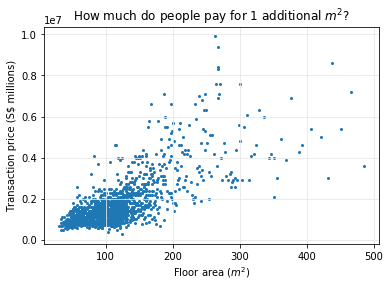

In [4]:
fig, ax = plt.subplots(1,1)
plt.scatter(df['FloorSqm'],df['Price'],s=4)
plt.title('How much do people pay for 1 additional $m^2$?')
plt.xlabel('Floor area ($m^2$)')
plt.ylabel('Transaction price (S$ millions)')
plt.grid(color=(.9,.9,.9))
plt.show()

Can we manually find the **best** linear relationship between the floor area and the property price?

In [13]:
alpha = 0
beta = 5000
df['FitPrice'] = alpha + beta*df['FloorSqm']

fig, ax = plt.subplots(1,1)
plt.scatter(df['FloorSqm'],df['Price'],s=4)
plt.plot(df['FloorSqm'],df['FitPrice'],color=(0,0,0))
plt.title('How much do people pay for 1 additional $m^2$?')
plt.xlabel('Floor area ($m^2$)')
plt.ylabel('Transaction price (S$ 10 millions)')
plt.legend(['Linear fit','Actual transactions'])
plt.grid(color=(.9,.9,.9))
plt.show()

KeyError: 'FloorSqm'

## 3. Linear fit


The library `statsmodels` offers us the the function `ols` (Ordinary Least Squares) to find the best linear fit automatically:

In [6]:
reg1 = smf.ols("Price ~ FloorSqm", data = df).fit()
print(reg1.params)

Intercept    23419.840981
FloorSqm     14923.231846
dtype: float64


How do we interpret this result?

_**For any additional square meter, the price of the property is increasing by $14,923**_


## 4. Categorical variables

What about the situation in which we have to work with categorical variables?

In [7]:
reg2 = smf.ols('Price ~ FloorSqm + C(Lease) + C(Year)', data = df).fit()
print(reg2.params)

Intercept                127737.677609
C(Lease)[T.Leasehold]   -580167.174141
C(Year)[T.2010]         -131349.703850
C(Year)[T.2011]         -142456.901513
C(Year)[T.2012]          167931.487933
C(Year)[T.2013]          176737.115454
C(Year)[T.2014]          177149.078236
C(Year)[T.2015]          478191.311526
C(Year)[T.2016]          577976.234851
C(Year)[T.2017]          194608.399760
C(Year)[T.2018]          611794.453302
FloorSqm                  14979.880751
dtype: float64


## 5. Logarithms

In [8]:
reg3 = smf.ols("np.log(Price) ~ np.log(FloorSqm) + C(Lease) + C(Year)", data = df).fit()
print(reg3.params)

Intercept                10.192901
C(Lease)[T.Leasehold]    -0.324428
C(Year)[T.2010]          -0.045265
C(Year)[T.2011]          -0.040133
C(Year)[T.2012]           0.129396
C(Year)[T.2013]           0.133315
C(Year)[T.2014]           0.163472
C(Year)[T.2015]           0.339511
C(Year)[T.2016]           0.351641
C(Year)[T.2017]           0.158549
C(Year)[T.2018]           0.326571
np.log(FloorSqm)          0.870743
dtype: float64


How do we interpret this result?

_**For any additional 1% larger floor area, the price of the property is increasing by 0.87%**_

## 6. Statistical significance

The regression procedure also delivers for us a measure of the precision of the estimation called `standard error`.

We can get the standard errors in the following way:

In [9]:
print(reg3.bse)

Intercept                0.115157
C(Lease)[T.Leasehold]    0.022172
C(Year)[T.2010]          0.057047
C(Year)[T.2011]          0.036136
C(Year)[T.2012]          0.036388
C(Year)[T.2013]          0.041883
C(Year)[T.2014]          0.041590
C(Year)[T.2015]          0.045244
C(Year)[T.2016]          0.057514
C(Year)[T.2017]          0.049418
C(Year)[T.2018]          0.063220
np.log(FloorSqm)         0.023052
dtype: float64


How do we use the standard errors? We use them to compute confidence intervals.

The confidence interval bounds are 2 times the standard error.

For example: the confidence interval for *np.log(FloorSqm)* is **[0.87 - 2\*0.023, 0.87 + 2\*0.023]**

## 7. Coefficient plot with error bars

Let's now bring everything together into a single plot:

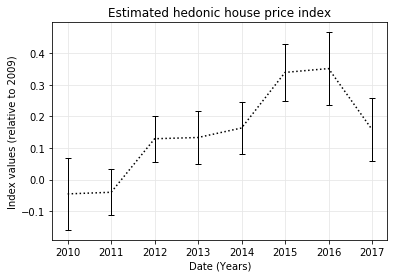

In [10]:
fig, ax = plt.subplots(1,1)
plt.errorbar(reg3.params.index[2:10], reg3.params[2:10], yerr=2*reg3.bse[2:10],
             capsize=3,elinewidth=1,markeredgewidth=1,linestyle='dotted',color=(0,0,0))
plt.grid(color=(.9,.9,.9))
ax.set_xticklabels(np.arange(2010,2018))
plt.title('Estimated hedonic house price index')
plt.xlabel('Date (Years)')
plt.ylabel('Index values (relative to 2009)')
plt.show()

# Exercises

In [11]:
df = pd.read_csv('Data/income-and-education.csv')